In [1]:
# Libraries
import pandas as pd

In [2]:
# Importing Data
df = pd.read_csv('Admission_Predict.csv')

In [3]:
# Data Shape
df.shape

(400, 9)

In [4]:
# Sample
df.sample(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
43,44,332,117,4,4.5,4.0,9.10,0,0.87
246,247,316,105,3,3.0,3.5,8.73,0,0.72
285,286,331,116,5,4.0,4.0,9.26,1,0.93


In [5]:
# Null
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Dropping Unecessary Columns
df.drop(columns=['Serial No.'],axis=1,inplace=True)

In [7]:
# Head
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
# Splitting Dependent and Independent Data
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [9]:
# Scaling Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [10]:
# Splitting Data using Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1 , random_state = 0)

### Model Building

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [12]:
# Initializing Model

model = Sequential()

In [13]:
model.add(Dense(7, activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(1, activation = 'linear'))

In [14]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Compiling Model
model.compile(optimizer='sgd', loss = 'mean_squared_error')

In [16]:
# Model Data Fit
history = model.fit(x_train, y_train, epochs = 100, batch_size = 10, verbose = 1, validation_split=0.2)

Epoch 1/100
29/29 [==============================] - 1s 10ms/step - loss: 0.3320 - val_loss: 0.2290
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.1792 - val_loss: 0.1699
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.1436 - val_loss: 0.1364
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.1175 - val_loss: 0.1161
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0981 - val_loss: 0.0988
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0830 - val_loss: 0.0853
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0712 - val_loss: 0.0742
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0618 - val_loss: 0.0660
Epoch 9/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0543 - val_loss: 0.0591
Epoch 10/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0483 - val_loss: 0.0528
Epoch 11

29/29 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0061
Epoch 84/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0062
Epoch 85/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0061
Epoch 86/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.0061
Epoch 87/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0060
Epoch 88/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0060
Epoch 89/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0060
Epoch 90/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0060
Epoch 91/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0059
Epoch 92/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0059
Epoch 93/100


In [17]:
# Prediction
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 16ms/step


In [18]:
# Model Performance
r2_score(y_test, y_pred)

0.6602928950915679

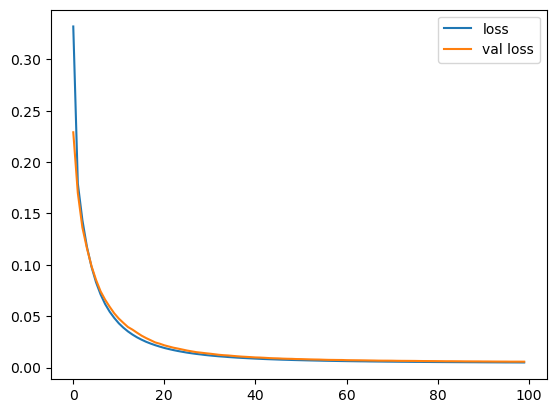

In [19]:
# Loss Plotting for Model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val loss'])
plt.show()